In [1]:
# Load r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import os
import os

In [4]:
# Translate NYT API key to R
%R -i nyt_api -i nyt_api

In [5]:
# Load NYT API key from environment variables
NYT_ID = os.getenv('NYT_ID')

In [6]:
# Translate NYT API key to R
%R -i NYT_ID -i NYT_ID

In [7]:
# Set api variable for nytime search function
%%R 
api = NYT_ID

In [9]:
# Declare nytime search function
%%R 
nytime = function (keyword,date1,date2) {
  searchQ = URLencode(keyword)
  url = paste('http://api.nytimes.com/svc/search/v2/articlesearch.json?q=',searchQ,
              '&begin_date=',date1,'&end_date=',date2,'&api-key=',api,sep="")
  #get the total number of search results
  initialsearch = fromJSON(url,flatten = T)
  maxPages = round((initialsearch$response$meta$hits / 10)-1)
  
  #try with the max page limit at 20
  maxPages = ifelse(maxPages >= 20, 20, maxPages)
  
  #creat a empty data frame
  df = data.frame(id=as.numeric(),created_time=character(),snippet=character(),
                  headline=character())
  
  #save search results into data frame
  for(i in 0:maxPages){
    #get the search results of each page
    nytSearch = fromJSON(paste0(url, "&page=", i), flatten = T) 
    temp = data.frame(id=1:nrow(nytSearch$response$docs),
                      published_date = nytSearch$response$docs$pub_date,
                      snippet = nytSearch$response$docs$snippet,
                      lead_paragraph = nytSearch$response$docs$lead_paragraph,
                      headline = nytSearch$response$docs$headline.main)
    df=rbind(df,temp)
    Sys.sleep(6) #sleep for 6 second
  }
  return(df)
}

In [10]:
# Require json lite pacakge in R
%%R 
if (!require("jsonlite")) install.packages("jsonlite")
library(jsonlite)
install.packages('curl') 

R[write to console]: Loading required package: jsonlite



--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://cran.case.edu/bin/macosx/contrib/4.0/curl_4.3.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 741519 bytes (724 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console


The downloaded binary packages are in
	/var/folders/8p/d3m74mc1461b0q4gx5ncs__r0000gn/T//Rtmpod2HLz/downloaded_packages


In [ ]:
%%R
# Run the nytime search function with specified arguments and save result to DataFrame
df = nytime('cryptocurrency',20090701,20200630)
# Write DataFrame to csv
write.csv(df, "NYT_news_bitcoin.csv")

In [12]:
# Import python modules for cleaning ad sorting DataFrame
import pandas as pd
import datetime as dt
from datetime import date, datetime, timedelta

In [13]:
# Read search results csv into Pandas DataFrame
df = pd.read_csv("NYT_news_bitcoin.csv")

In [14]:
# List DataFrame column names
df.columns

Index(['Unnamed: 0', 'id', 'published_date', 'snippet', 'lead_paragraph',
       'headline'],
      dtype='object')

In [87]:
df

,published_date,snippet,lead_paragraph,headline
126,2020-04-28,The authorities have announced that the kidnap...,OSLO — The police arrested one of Norway’s wea...,"Tom Hagen, Wealthy Businessman in Norway, Char..."
12,2020-04-16,"After months of criticism, the cryptocurrency ...","OAKLAND, Calif. — When Facebook unveiled its L...",Facebook-Backed Libra Cryptocurrency Project I...
154,2020-04-15,"Through the attacks, a report says, the North ...",WASHINGTON — The United States accused North K...,"U.S. Accuses North Korea of Cyberattacks, a Si..."
116,2020-03-20,Gabriel Jiménez hated the Venezuelan strongman...,"Just after midnight one Tuesday in early 2018,...",The Coder and the Dictator
196,2020-03-13,"The S&P 500 rose more than 9 percent, making F...","Stocks rallied Friday, rebounding from their w...",Stocks Rally as Trump and Business Leaders Ple...
...,...,...,...,...
41,2015-03-18,A look at the rapidly evolving world of digita...,"Money, “The Age of Cryptocurrency” ­explains, ...","‘The Age of Cryptocurrency,’ by Paul Vigna and..."
148,2014-03-06,The existence of Internet-based currencies fol...,Updated with additional reporting. | So it app...,Bitcoin Is a Protocol. Bitcoin Is a Brand.
166,2014-03-03,Britain’s tax agency said on Monday that it wo...,LONDON – British tax authorities said on Monda...,Britain Drops Plan to Tax Trading of Bitcoins
88,2014-02-11,Yet another mini-crisis for the bitcoin crypto...,Yet another mini-crisis for the bitcoin crypto...,Exchange crash reveals bitcoin's real-world we...


In [15]:
# List DataFrame data types
df.dtypes

Unnamed: 0         int64
id                 int64
published_date    object
snippet           object
lead_paragraph    object
headline          object
dtype: object

In [16]:
# Convert 'published_date' column to datetime and keep date
df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d %H:%M:%S').dt.date
# Sort DataFrame by 'published_date' column
df = df.sort_values(by=['published_date'], ascending=False)
# Drop first 3 columns of DataFrame
df = df.drop(['Unnamed: 0'], 1)
df = df.drop(['id'], 1)

In [17]:
# Write cleaned DataFrame to csv
df.to_csv("NYT_news_bitcoin_cleaned.csv", encoding='utf-8')

In [18]:
# Extract 'lead_paragraph' and 'snippet' columns from DataFrame
df2 = df[['lead_paragraph','snippet']]

In [19]:
# Import nltk and download stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/coreyrecai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Convert stop words from comma separated list to space separated string
separator = ' '
mystopwords = separator.join(stopwords)

In [21]:
# Translate DataFrame and stopwords to R
%R -i df2 -i df2
%R -i mystopwords -i mystopwords

In [22]:
# Declare preprocessing function
%%R 
if (!require("tm")) install.packages("tm")
library(tm)
#preprocessing function for text
preprocessing = function (doc){
  doc = gsub("[^[:alnum:]]"," ",doc)
  #create corpus
  corpus = Corpus(VectorSource(doc))
  #Removal of punctuation
  corpus = tm_map(corpus, removePunctuation)
  #Removal of numbers
  corpus = tm_map(corpus, removeNumbers)
  #Conversion to lower case
  corpus = tm_map(corpus, content_transformer(tolower)) 
  #customize my stopwords
  mystopword = mystopwords
  #Removal of stopwords
  corpus = tm_map(corpus, removeWords, c(stopwords("english"),mystopword))
  #retun result
  return(corpus)
}

R[write to console]: Loading required package: tm

R[write to console]: Loading required package: NLP



In [23]:
# Run preprocessing function on DataFrame
%%R 
dt.clean = preprocessing(df2)

R[write to console]: Loading required package: wordcloud

R[write to console]: Loading required package: RColorBrewer



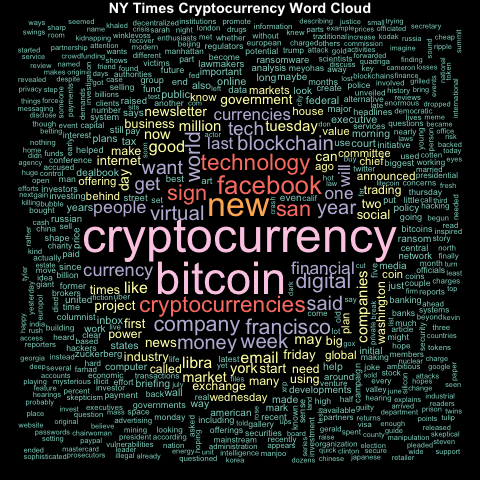

In [24]:
# Render cleaned data into Word Cloud
%%R 
if (!require("wordcloud")) install.packages("wordcloud")
library(wordcloud)

par(mfrow=c(1,1)) # 1x1 panel plot
par(mar=c(1, 3, 1, 3)) # Set the plot margin
par(bg="black") # set background color as black
par(col.main="white") # set snippet color as white
wordcloud(dt.clean, scale=c(4,.5),min.freq=3, max.words=Inf, random.order=F, 
          colors = brewer.pal(8, "Set3"))   

title("NY Times Cryptocurrency Word Cloud")

In [25]:
# Convert cleaned data to Term Document Matrix
%%R
tdm <- TermDocumentMatrix(dt.clean, control = list(wordLengths = c(3, Inf))) # set minimum word length to 3

In [26]:
# Find frequent terms in cleaned data
%%R
(freq.terms <- findFreqTerms(tdm, lowfreq=3)) # set minimum occurence to 3

  [1] "access"           "according"        "accounts"        
  [4] "accused"          "activities"       "actor"           
  [7] "actually"         "administration"   "advertising"     
 [10] "agency"           "ago"              "ahead"           
 [13] "already"          "also"             "alternative"     
 [16] "ambitious"        "american"         "analysis"        
 [19] "announced"        "another"          "appears"         
 [22] "around"           "arrived"          "art"             
 [25] "article"          "asked"            "attack"          
 [28] "attacks"          "attention"        "authorities"     
 [31] "available"        "away"             "back"            
 [34] "backed"           "banking"          "banks"           
 [37] "based"            "became"           "become"          
 [40] "begun"            "behind"           "beijing"         
 [43] "believe"          "best"             "betting"         
 [46] "beyond"           "big"              "biggest"  

In [27]:
# Export term frequency data to DataFrame
%%R
term.freq <- rowSums(as.matrix(tdm))
term.freq <- subset(term.freq, term.freq >=5) # set minimum frequency to 5
freq_df <- data.frame(term = names(term.freq), freq = term.freq)

In [28]:
# Translate freq_df to Python
%R -o freq_df -o freq_df

In [ ]:
# Use for hosted Runtime
#!pip install hvplot holoviews

In [ ]:
# Use for hosted Runtime
#!pip install --upgrade bokeh

In [31]:
# Import hvplot
import hvplot.pandas
import holoviews as hv
import seaborn as sns

Output hidden; open in https://colab.research.google.com to view.

In [32]:
# Use for hosted Runtime 
os.environ['HV_DOC_HTML'] = 'true' 
hv.extension('bokeh') 

# Plot frequent terms
hvplot.show(freq_df.hvplot.bar(height=900, width=1900, rot=90))

Output hidden; open in https://colab.research.google.com to view.

In [33]:
# Read cleaned 
nyt = pd.read_csv('NYT_news_bitcoin_cleaned.csv')
nyt.head()

,Unnamed: 0,published_date,snippet,lead_paragraph,headline
0,126,2020-04-28,The authorities have announced that the kidnap...,OSLO — The police arrested one of Norway’s wea...,"Tom Hagen, Wealthy Businessman in Norway, Char..."
1,12,2020-04-16,"After months of criticism, the cryptocurrency ...","OAKLAND, Calif. — When Facebook unveiled its L...",Facebook-Backed Libra Cryptocurrency Project I...
2,154,2020-04-15,"Through the attacks, a report says, the North ...",WASHINGTON — The United States accused North K...,"U.S. Accuses North Korea of Cyberattacks, a Si..."
3,116,2020-03-20,Gabriel Jiménez hated the Venezuelan strongman...,"Just after midnight one Tuesday in early 2018,...",The Coder and the Dictator
4,196,2020-03-13,"The S&P 500 rose more than 9 percent, making F...","Stocks rallied Friday, rebounding from their w...",Stocks Rally as Trump and Business Leaders Ple...


In [34]:
# Import Sentiment Analyzer and Download/Update the VADER Lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/coreyrecai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [37]:
# Sentiment scores dictionaries
snippet_sent = {
    "snippet_compound": [],
    "snippet_pos": [],
    "snippet_neu": [],
    "snippet_neg": [],
    "snippet_sent": [],
}
lead_paragraph_sent = {
    "lead_paragraph_compound": [],
    "lead_paragraph_pos": [],
    "lead_paragraph_neu": [],
    "lead_paragraph_neg": [],
    "lead_paragraph_sent": [],
}
headline_sent = {
    "headline_compound": [],
    "headline_pos": [],
    "headline_neu": [],
    "headline_neg": [],
    "headline_sent": [],
}

# Get sentiment for the text and the title
for index, row in nyt.iterrows():
  try:
    # Sentiment scoring with VADER
    snippet_sentiment = analyzer.polarity_scores(row["snippet"])
    snippet_sent["snippet_compound"].append(snippet_sentiment["compound"])
    snippet_sent["snippet_pos"].append(snippet_sentiment["pos"])
    snippet_sent["snippet_neu"].append(snippet_sentiment["neu"])
    snippet_sent["snippet_neg"].append(snippet_sentiment["neg"])
    snippet_sent["snippet_sent"].append(get_sentiment(snippet_sentiment["compound"]))

    lead_paragraph_sentiment = analyzer.polarity_scores(row["lead_paragraph"])
    lead_paragraph_sent["lead_paragraph_compound"].append(lead_paragraph_sentiment["compound"])
    lead_paragraph_sent["lead_paragraph_pos"].append(lead_paragraph_sentiment["pos"])
    lead_paragraph_sent["lead_paragraph_neu"].append(lead_paragraph_sentiment["neu"])
    lead_paragraph_sent["lead_paragraph_neg"].append(lead_paragraph_sentiment["neg"])
    lead_paragraph_sent["lead_paragraph_sent"].append(get_sentiment(lead_paragraph_sentiment["compound"]))

    headline_sentiment = analyzer.polarity_scores(row["headline"])
    headline_sent["headline_compound"].append(headline_sentiment["compound"])
    headline_sent["headline_pos"].append(headline_sentiment["pos"])
    headline_sent["headline_neu"].append(headline_sentiment["neu"])
    headline_sent["headline_neg"].append(headline_sentiment["neg"])
    headline_sent["headline_sent"].append(get_sentiment(headline_sentiment["compound"]))
  except AttributeError:
      pass

# Attaching sentiment columns to the News DataFrame
snippet_sentiment_df = pd.DataFrame(snippet_sent)
lead_paragraph_sentiment_df = pd.DataFrame(lead_paragraph_sent)
headline_sentiment_df = pd.DataFrame(headline_sent)
nyt = nyt.join(snippet_sentiment_df).join(lead_paragraph_sentiment_df).join(headline_sentiment_df)
nyt.head()

,Unnamed: 0,published_date,snippet,lead_paragraph,headline,snippet_compound,snippet_pos,snippet_neu,snippet_neg,snippet_sent,lead_paragraph_compound,lead_paragraph_pos,lead_paragraph_neu,lead_paragraph_neg,lead_paragraph_sent,headline_compound,headline_pos,headline_neu,headline_neg,headline_sent
0,126,2020-04-28,The authorities have announced that the kidnap...,OSLO — The police arrested one of Norway’s wea...,"Tom Hagen, Wealthy Businessman in Norway, Char...",0.4939,0.122,0.878,0.000,1,-0.7269,0.069,0.731,0.200,-1,-0.5719,0.159,0.446,0.395,-1
1,12,2020-04-16,"After months of criticism, the cryptocurrency ...","OAKLAND, Calif. — When Facebook unveiled its L...",Facebook-Backed Libra Cryptocurrency Project I...,-0.2732,0.122,0.680,0.197,-1,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,154,2020-04-15,"Through the attacks, a report says, the North ...",WASHINGTON — The United States accused North K...,"U.S. Accuses North Korea of Cyberattacks, a Si...",-0.4215,0.111,0.686,0.203,-1,-0.2732,0.128,0.701,0.171,-1,-0.6908,0.000,0.612,0.388,-1
3,116,2020-03-20,Gabriel Jiménez hated the Venezuelan strongman...,"Just after midnight one Tuesday in early 2018,...",The Coder and the Dictator,0.1027,0.176,0.692,0.132,1,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
4,196,2020-03-13,"The S&P 500 rose more than 9 percent, making F...","Stocks rallied Friday, rebounding from their w...",Stocks Rally as Trump and Business Leaders Ple...,0.6369,0.244,0.756,0.000,1,0.1531,0.172,0.680,0.147,1,0.4019,0.252,0.748,0.000,1


In [38]:
# Drop 'Unnamed: 0' column from DataFrame
nyt.drop(['Unnamed: 0'], axis=1).head()

,published_date,snippet,lead_paragraph,headline,snippet_compound,snippet_pos,snippet_neu,snippet_neg,snippet_sent,lead_paragraph_compound,lead_paragraph_pos,lead_paragraph_neu,lead_paragraph_neg,lead_paragraph_sent,headline_compound,headline_pos,headline_neu,headline_neg,headline_sent
0,2020-04-28,The authorities have announced that the kidnap...,OSLO — The police arrested one of Norway’s wea...,"Tom Hagen, Wealthy Businessman in Norway, Char...",0.4939,0.122,0.878,0.000,1,-0.7269,0.069,0.731,0.200,-1,-0.5719,0.159,0.446,0.395,-1
1,2020-04-16,"After months of criticism, the cryptocurrency ...","OAKLAND, Calif. — When Facebook unveiled its L...",Facebook-Backed Libra Cryptocurrency Project I...,-0.2732,0.122,0.680,0.197,-1,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,2020-04-15,"Through the attacks, a report says, the North ...",WASHINGTON — The United States accused North K...,"U.S. Accuses North Korea of Cyberattacks, a Si...",-0.4215,0.111,0.686,0.203,-1,-0.2732,0.128,0.701,0.171,-1,-0.6908,0.000,0.612,0.388,-1
3,2020-03-20,Gabriel Jiménez hated the Venezuelan strongman...,"Just after midnight one Tuesday in early 2018,...",The Coder and the Dictator,0.1027,0.176,0.692,0.132,1,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
4,2020-03-13,"The S&P 500 rose more than 9 percent, making F...","Stocks rallied Friday, rebounding from their w...",Stocks Rally as Trump and Business Leaders Ple...,0.6369,0.244,0.756,0.000,1,0.1531,0.172,0.680,0.147,1,0.4019,0.252,0.748,0.000,1


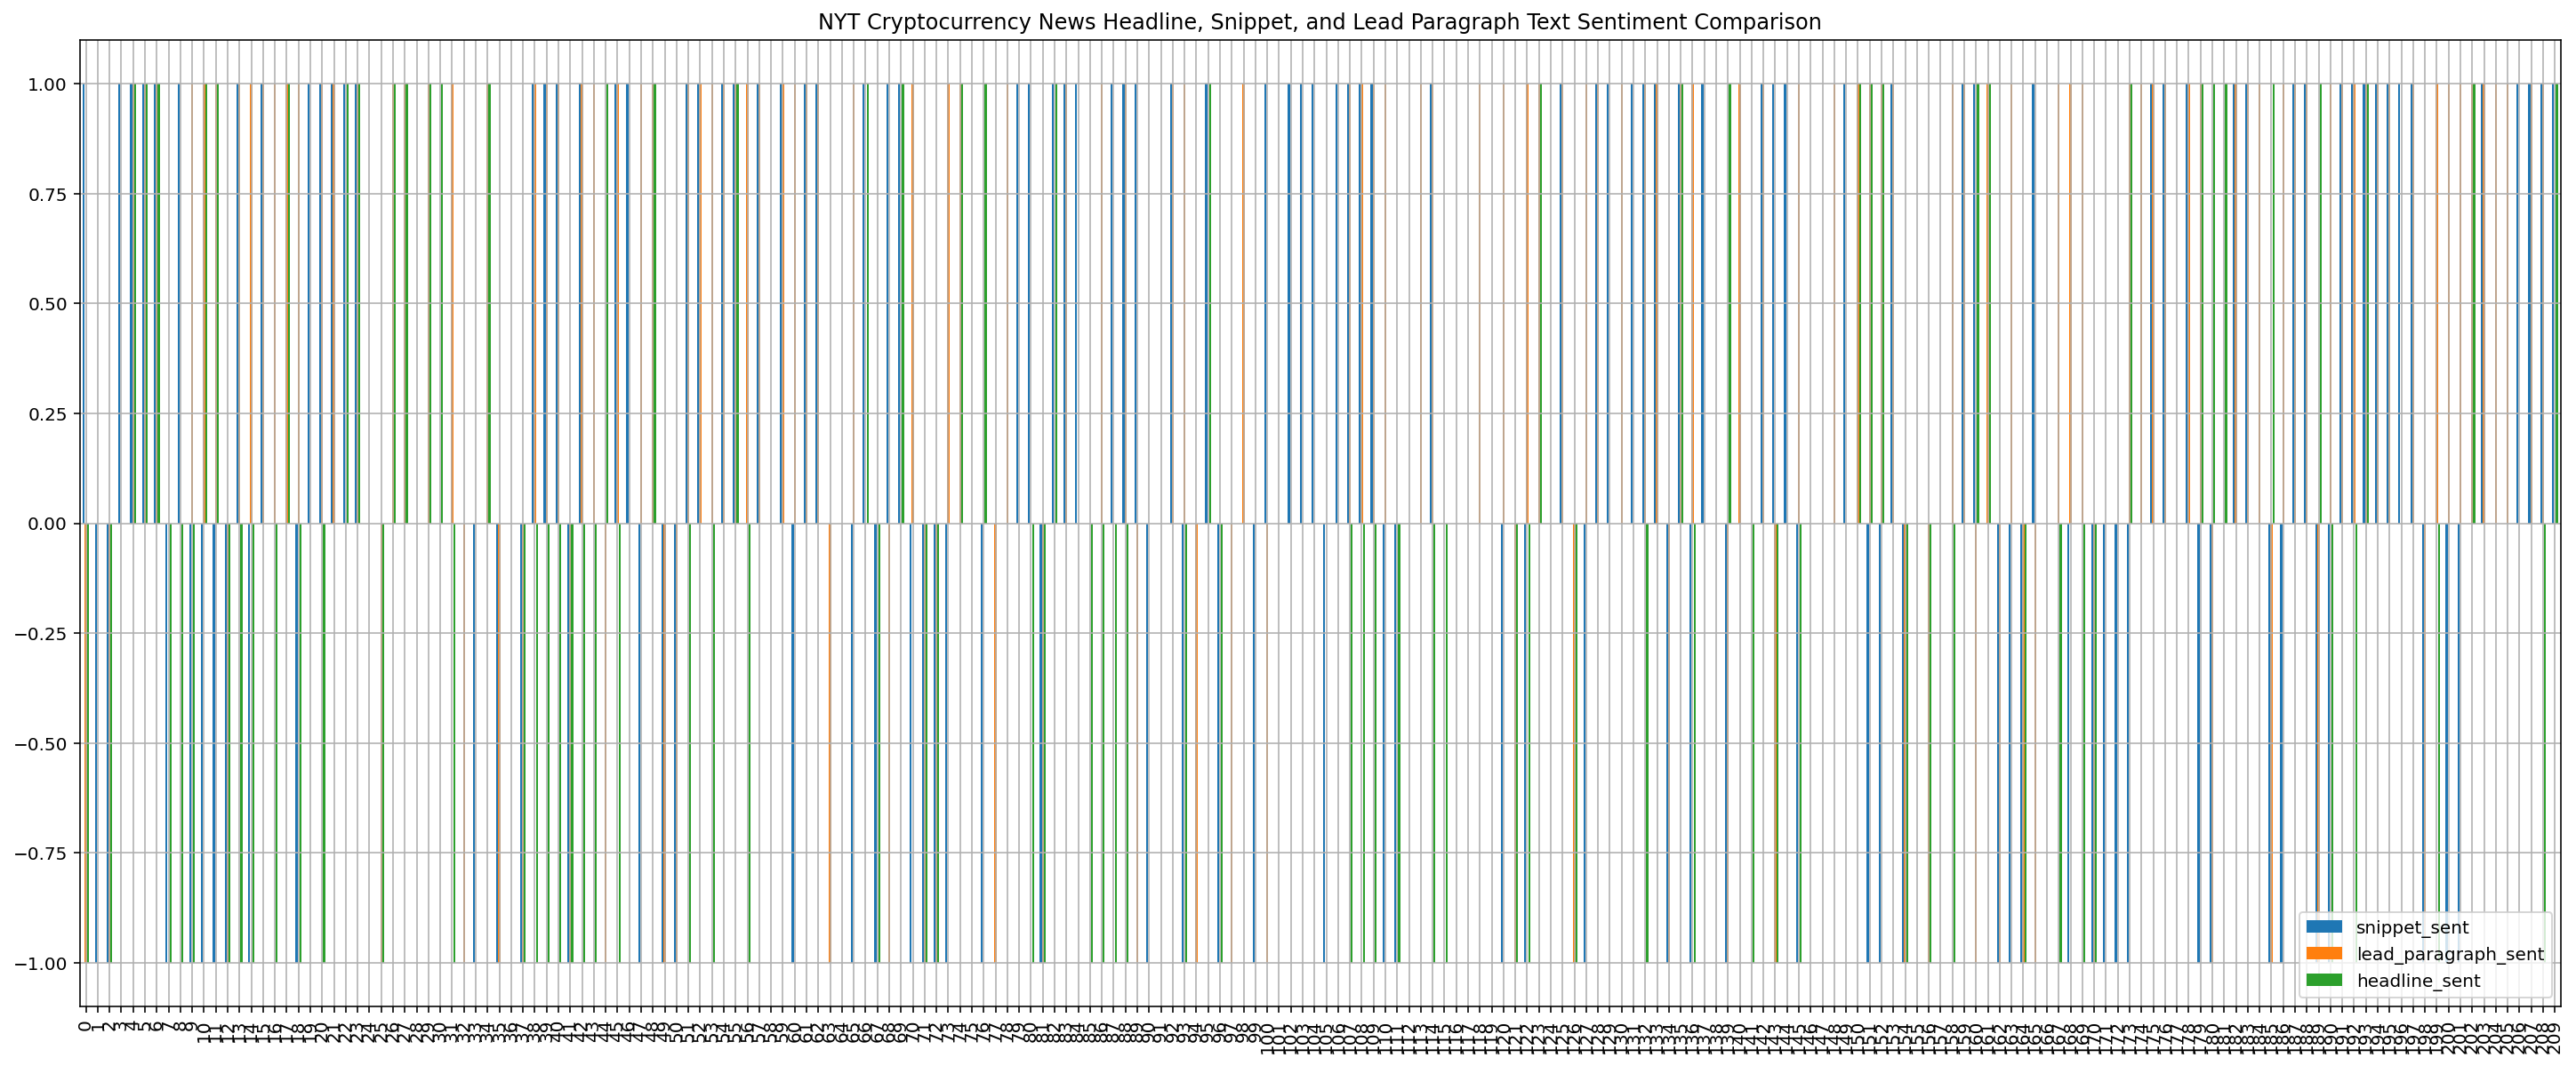

In [39]:
# Plot the Sentiment of the NYT News Articles
nyt.plot(
    y=["snippet_sent", "lead_paragraph_sent", "headline_sent"],
    kind="bar",
    title="NYT Cryptocurrency News Headline, Snippet, and Lead Paragraph Text Sentiment Comparison",
    figsize=(25, 10),
    grid=True,
)

In [40]:
# Create new DataFrame with 'published_date', 'headline_sent', 'snippet_sent'and 'lead_paragraph_sent'
newdf0 = nyt[['published_date', 'headline_sent', 'snippet_sent', 'lead_paragraph_sent']]

In [41]:
# Create a new column for 'average' and get the average sentiment of the headline, snippet and lead paragraph for each article to equal overall average sentiment of the Article
newdf0['average'] = newdf0.mean(axis=1)
newdf0

/Users/coreyrecai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,published_date,headline_sent,snippet_sent,lead_paragraph_sent,average
0,2020-04-28,-1,1,-1,-0.333333
1,2020-04-16,0,-1,0,-0.333333
2,2020-04-15,-1,-1,-1,-1.000000
3,2020-03-20,0,1,0,0.333333
4,2020-03-13,1,1,1,1.000000
...,...,...,...,...,...
205,2015-03-18,0,0,1,0.333333
206,2014-03-06,0,1,0,0.333333
207,2014-03-03,0,1,1,0.666667
208,2014-02-11,-1,1,1,0.333333


In [42]:
# Assign a positive or negative sentiment value to the Average Article Sentiment
article_sentiment = []
newdf1 = pd.DataFrame(newdf0['average'])

for index, row in newdf1.iterrows():
  if (row >= 0).bool():
    article_sentiment.append(1) # Positive 
  else:
    article_sentiment.append(-1) # Negative

newdf0['Article_Sentiment'] = article_sentiment

newdf0

/Users/coreyrecai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,published_date,headline_sent,snippet_sent,lead_paragraph_sent,average,Article_Sentiment
0,2020-04-28,-1,1,-1,-0.333333,-1
1,2020-04-16,0,-1,0,-0.333333,-1
2,2020-04-15,-1,-1,-1,-1.000000,-1
3,2020-03-20,0,1,0,0.333333,1
4,2020-03-13,1,1,1,1.000000,1
...,...,...,...,...,...,...
205,2015-03-18,0,0,1,0.333333,1
206,2014-03-06,0,1,0,0.333333,1
207,2014-03-03,0,1,1,0.666667,1
208,2014-02-11,-1,1,1,0.333333,1


In [43]:
# Create a copy DataFrame with Average Article Sentiment
newdf2 = newdf0[['published_date', 'headline_sent', 'snippet_sent', 'lead_paragraph_sent', 'average', 'Article_Sentiment']]

In [44]:
# Set index of Average Article Sentiment DataFrame to 'published_date'
newdf0.set_index(['published_date'], inplace=True)

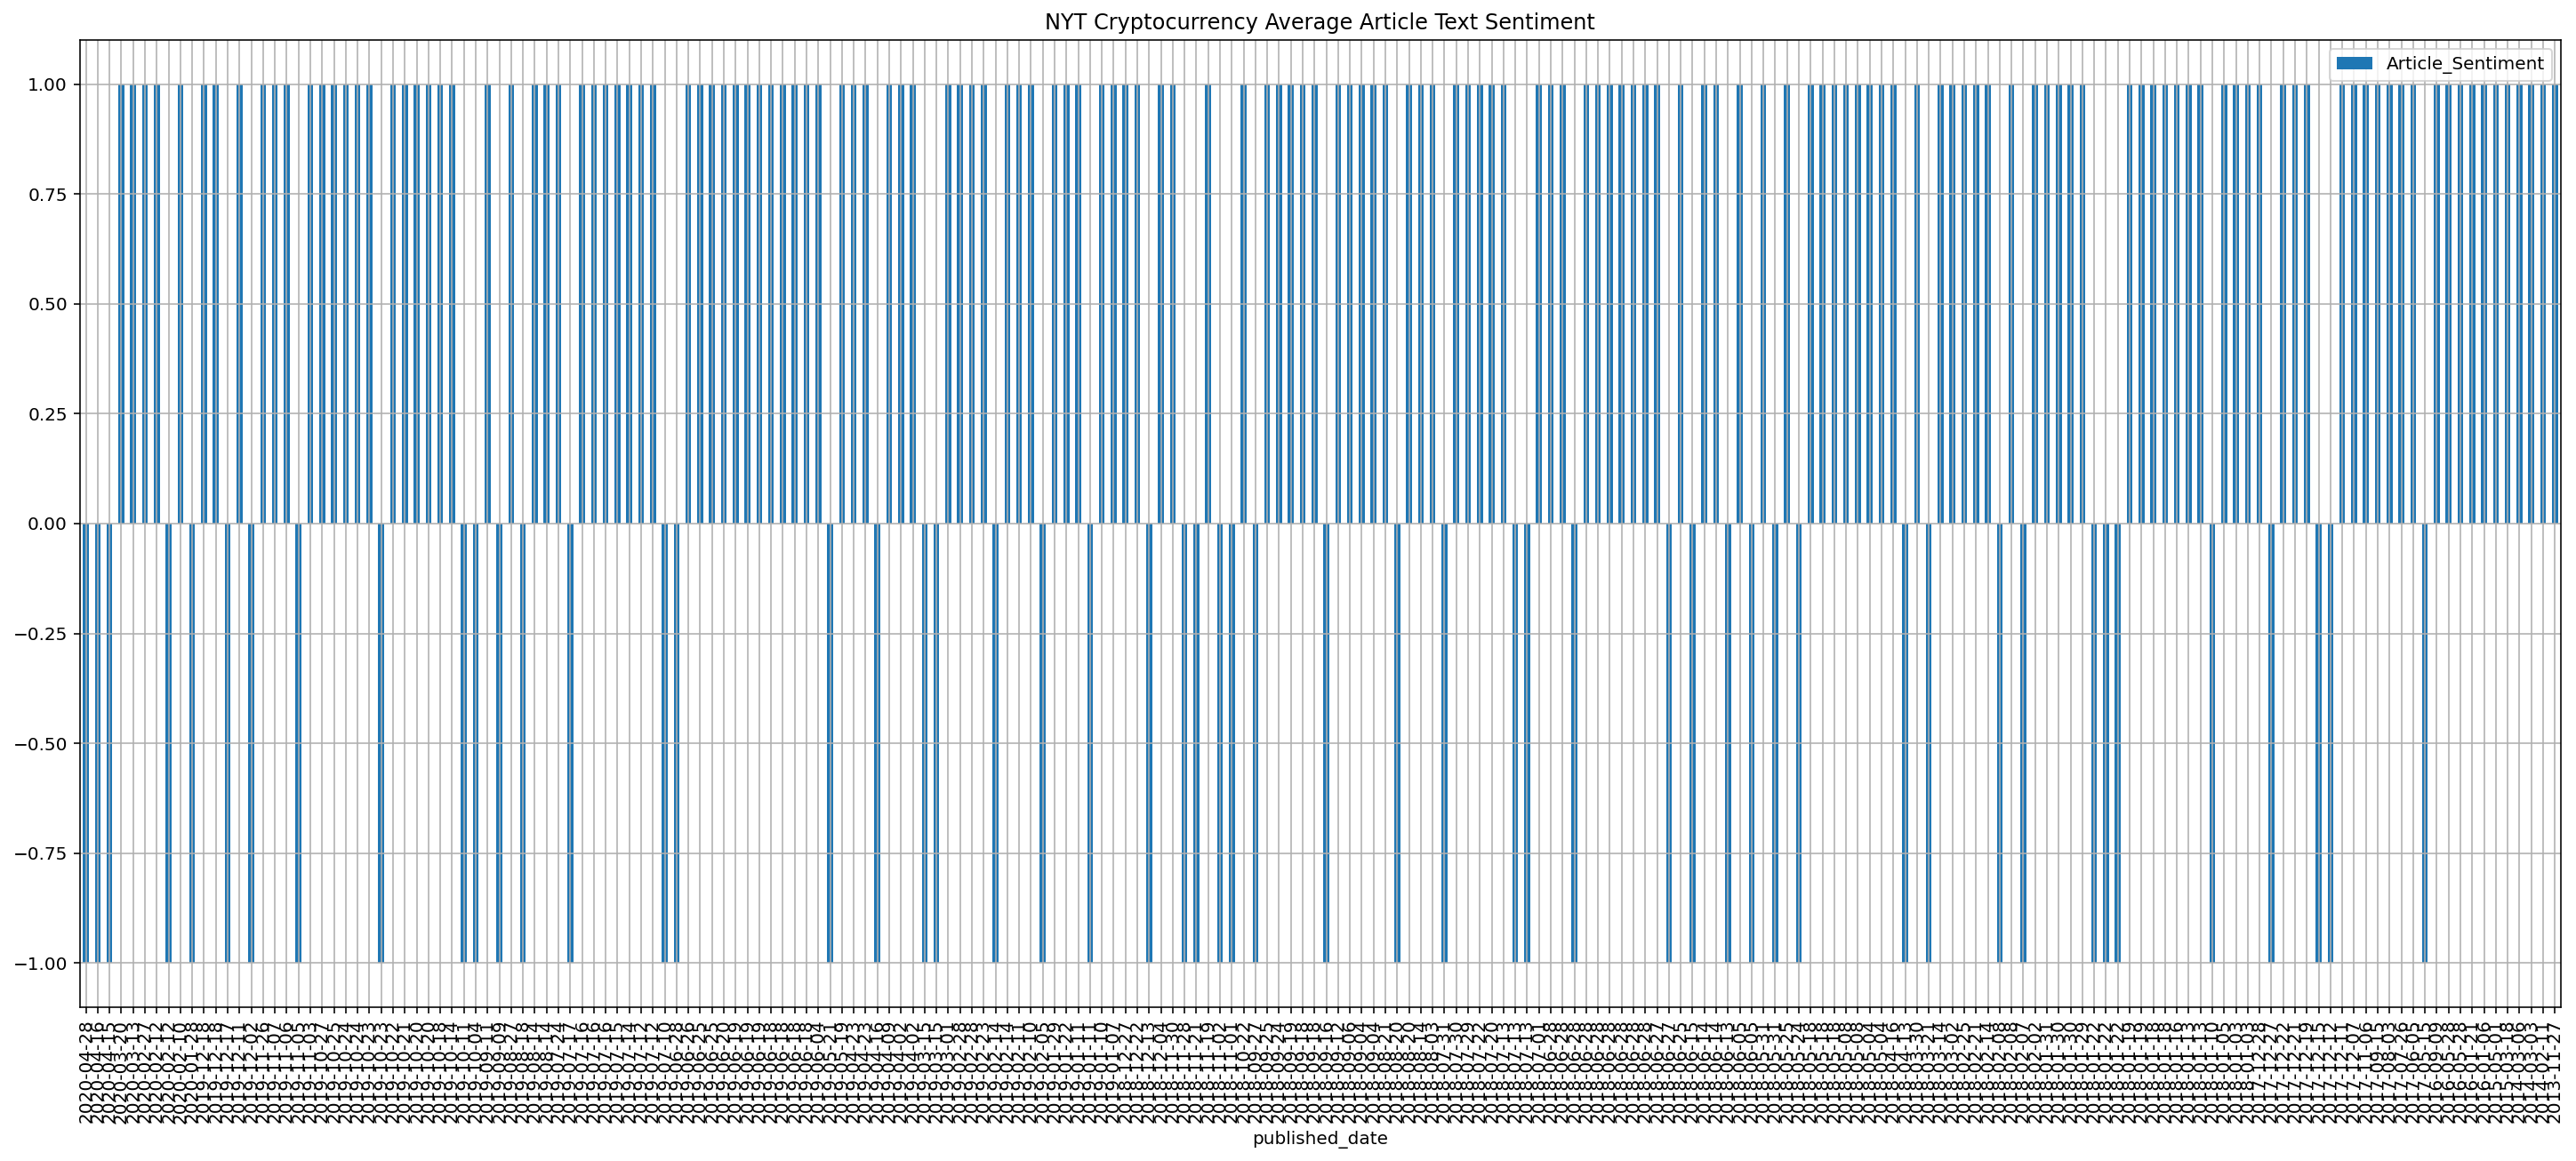

In [45]:
# Plot Average Article Sentiment
newdf0.plot(
    y=["Article_Sentiment"],
    kind="bar",
    title="NYT Cryptocurrency Average Article Text Sentiment",
    figsize=(25, 10),
    grid=True,
)

In [46]:
# Group copy of Average Article Sentiment DataFrame by year and month to equal Average Monthly Article Sentiment
newdf2['month'] = pd.to_datetime(newdf2['published_date']).dt.month
newdf2['year'] = pd.to_datetime(newdf2['published_date']).dt.year

newdf3 = newdf2[['month', 'year', 'Article_Sentiment']]
newdf4 = newdf3.groupby(['year','month'])['Article_Sentiment'].mean()

newdf4.head(10)

year  month
2013  11       1.0
2014  2        1.0
      3        1.0
2015  3        1.0
      5        1.0
2016  1        1.0
      5        1.0
      9        1.0
2017  5       -1.0
      6        1.0
Name: Article_Sentiment, dtype: float64

In [47]:
# Write Article Sentiment Data to csv
newdf4.to_csv("avg_mnthly_article_sent.csv", encoding='utf-8')

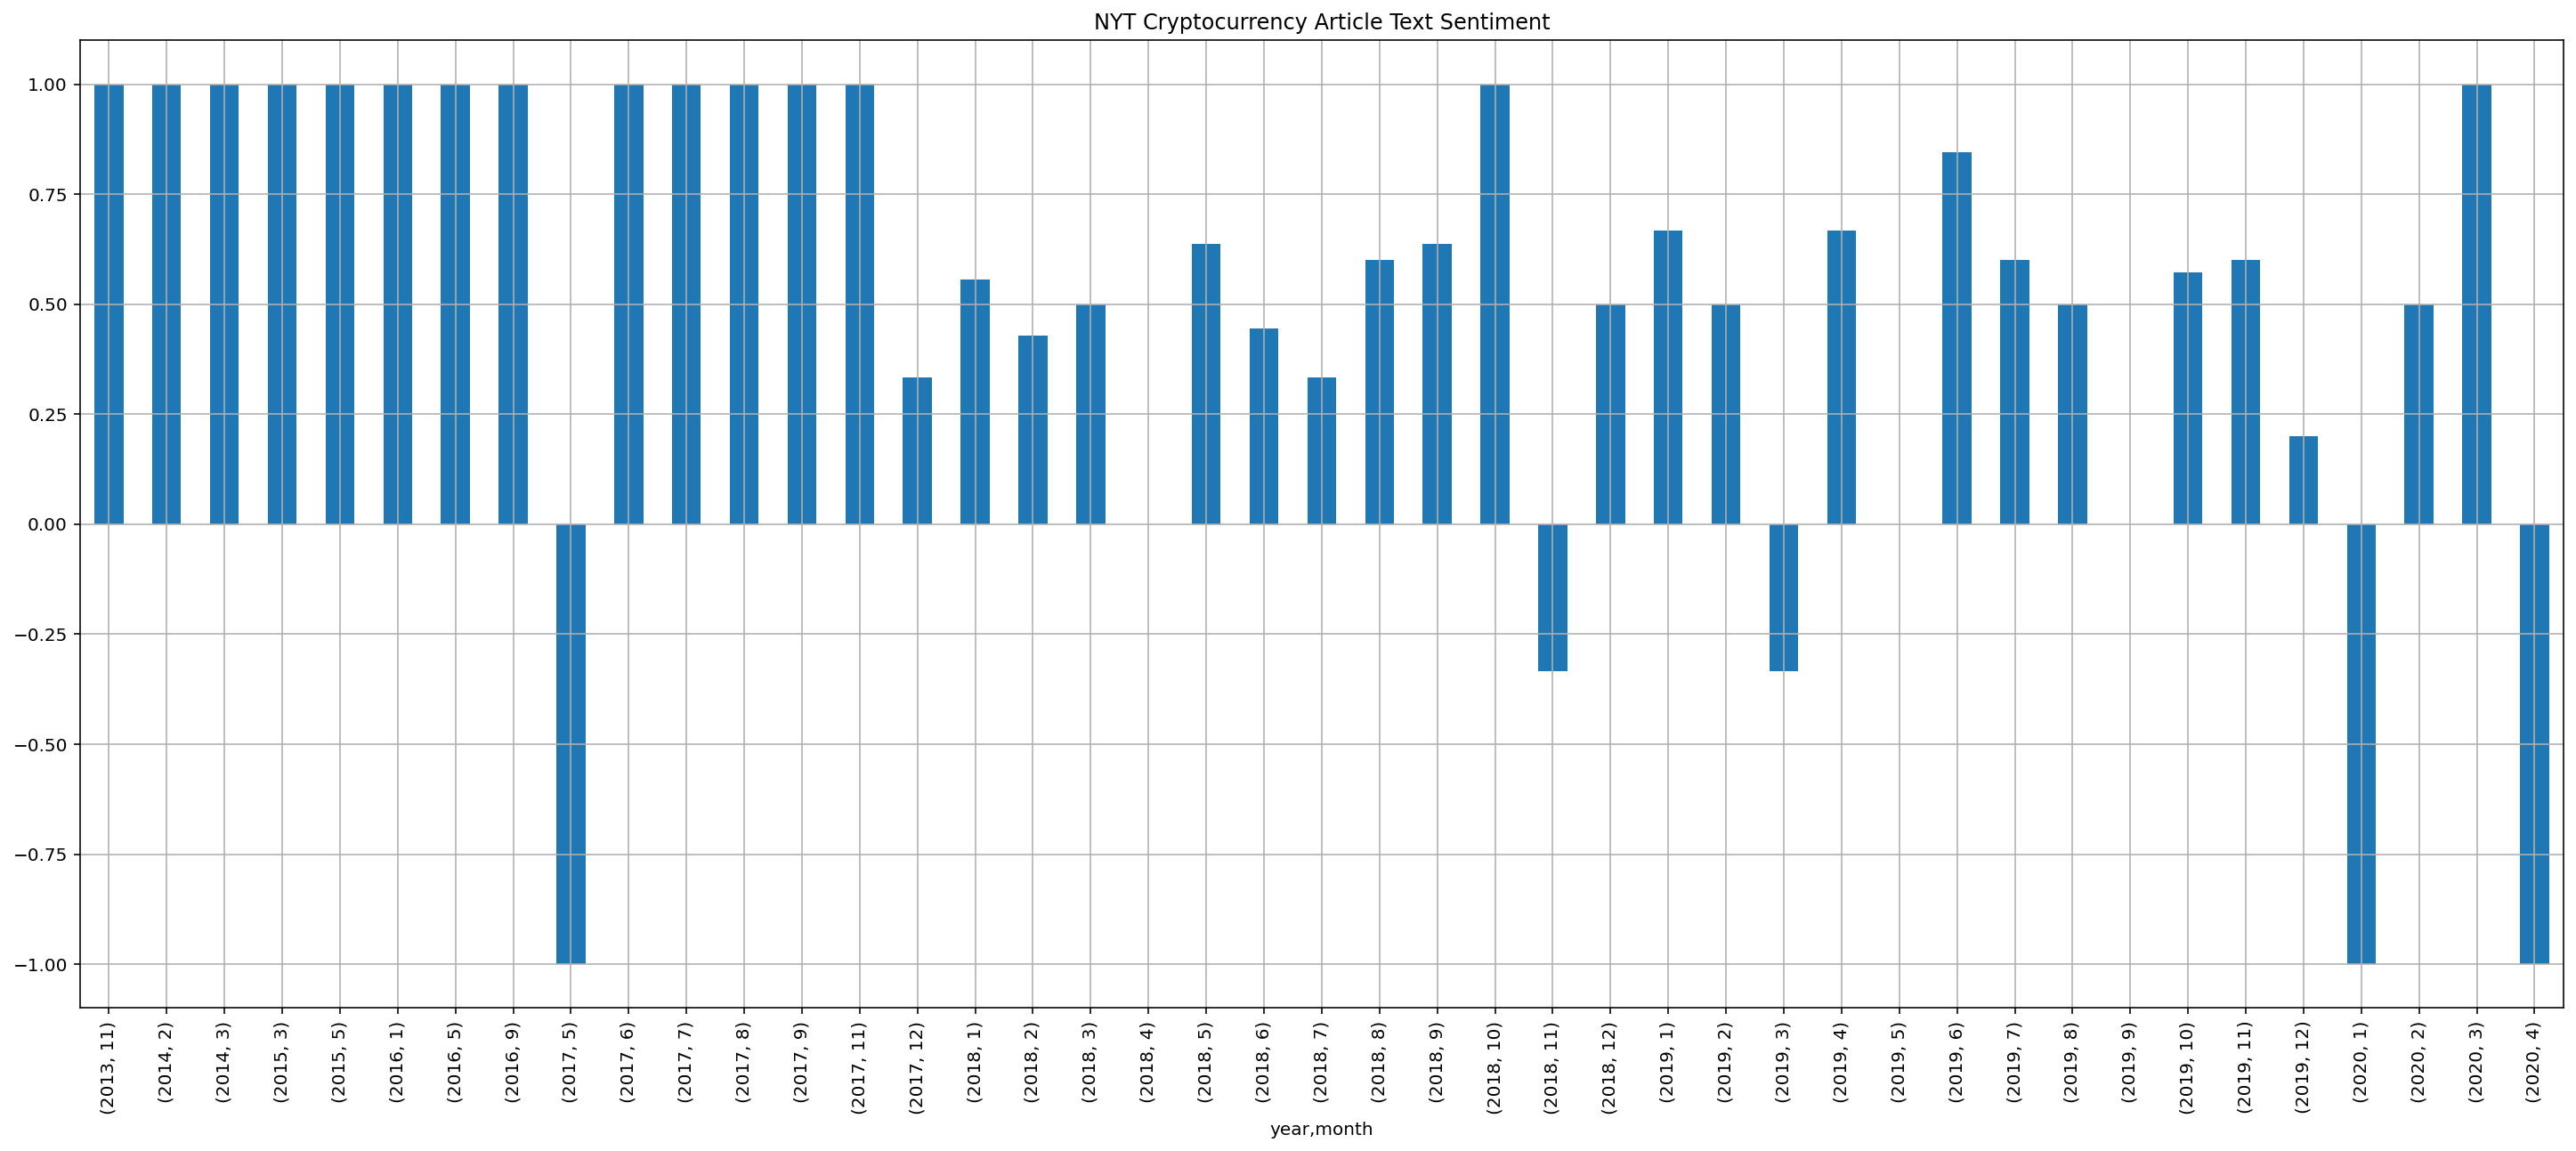

In [48]:
# Plot Average Monthly Article Sentiment
newdf4.plot(
    y=["Article_Sentiment"],
    kind="bar",
    title="NYT Cryptocurrency Article Text Sentiment",
    figsize=(25, 10),
    grid=True,
)

In [50]:
# Load QUANDL API from environment variables
QUANDL_ID = os.getenv('QUANDL_ID')

In [51]:
# Establish start and end date variables
start_date = "2013-09-01"
end_date = "2020-07-15"

# Encode search url
url= "https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key="+QUANDL_ID+"&start_date="+start_date+"&end_date="+end_date+"&order=asc&collapse=monthly&transform=rdiff"

In [52]:
# Import requests module
import requests
import time

In [53]:
# Download Bitcoin price data from QUANDL
file_request = requests.get(url, allow_redirects=True)
with open("bitcoin_price_data_clean.csv", "wb") as file:
    file.write(file_request.content)
time.sleep(10) # wait 10 seconds for file to write after request

In [54]:
# Read csv into DataFrame and get column names
btc_price_df = pd.read_csv('bitcoin_price_data_clean.csv')
btc_price_df.columns

Index(['Date', 'Value'], dtype='object')

In [55]:
# Change 'Value' column name to 'Price_Returns'
btc_price_df.rename(columns={'Value':'Price_Returns'}, inplace=True)
# Convert 'Date' column to datetime
btc_price_df['Date'] = pd.to_datetime(btc_price_df['Date'])
btc_price_df.head()

,Date,Price_Returns
0,2013-10-31,0.602623
1,2013-11-30,4.555082
2,2013-12-31,-0.347298
3,2014-01-31,0.097811
4,2014-02-28,-0.279788


In [56]:
# Use a for loop to a positive or negative value to 'Price Returns'
Price_Returns_Sentiment = []
tempdf0 = pd.DataFrame(btc_price_df['Price_Returns'])

for index, row in tempdf0.iterrows():
  if (row >= 0).bool():
    Price_Returns_Sentiment.append(1) # Positive 
  else:
    Price_Returns_Sentiment.append(-1) # Negative

btc_price_df['Price_Sentiment'] = Price_Returns_Sentiment

btc_price_df.tail(20)

,Date,Price_Returns,Price_Sentiment
62,2018-12-31,-0.101051,-1
63,2019-01-31,-0.107313,-1
64,2019-02-28,0.119783,1
65,2019-03-31,0.074149,1
66,2019-04-30,0.288112,1
67,2019-05-31,0.634127,1
68,2019-06-30,0.428417,1
69,2019-07-31,-0.232175,-1
70,2019-08-31,-0.001766,-1
71,2019-09-30,-0.132800,-1


In [57]:
# Group Price Returns Sentiment by year and month
btc_price_df['month'] = pd.to_datetime(btc_price_df['Date']).dt.month
btc_price_df['year'] = pd.to_datetime(btc_price_df['Date']).dt.year

tempdf1 = btc_price_df[['month', 'year', 'Price_Sentiment']]
tempdf2 = tempdf1.groupby(['year','month'])['Price_Sentiment'].mean()

tempdf2.head(10)

year  month
2013  10       1
      11       1
      12      -1
2014  1        1
      2       -1
      3       -1
      4       -1
      5        1
      6       -1
      7       -1
Name: Price_Sentiment, dtype: int64

In [58]:
# Group Price Returns by year and month
tempdf3 = btc_price_df[['month', 'year', 'Price_Returns']]
tempdf4 = tempdf3.groupby(['year','month'])['Price_Returns'].mean()

tempdf4.head(10)

year  month
2013  10       0.602623
      11       4.555082
      12      -0.347298
2014  1        0.097811
      2       -0.279788
      3       -0.209302
      4       -0.017505
      5        0.381849
      6       -0.000725
      7       -0.054839
Name: Price_Returns, dtype: float64

In [59]:
# Write Article Sentiment Data to csv
tempdf4.to_csv("avg_mnthly_price_returns.csv", encoding='utf-8')

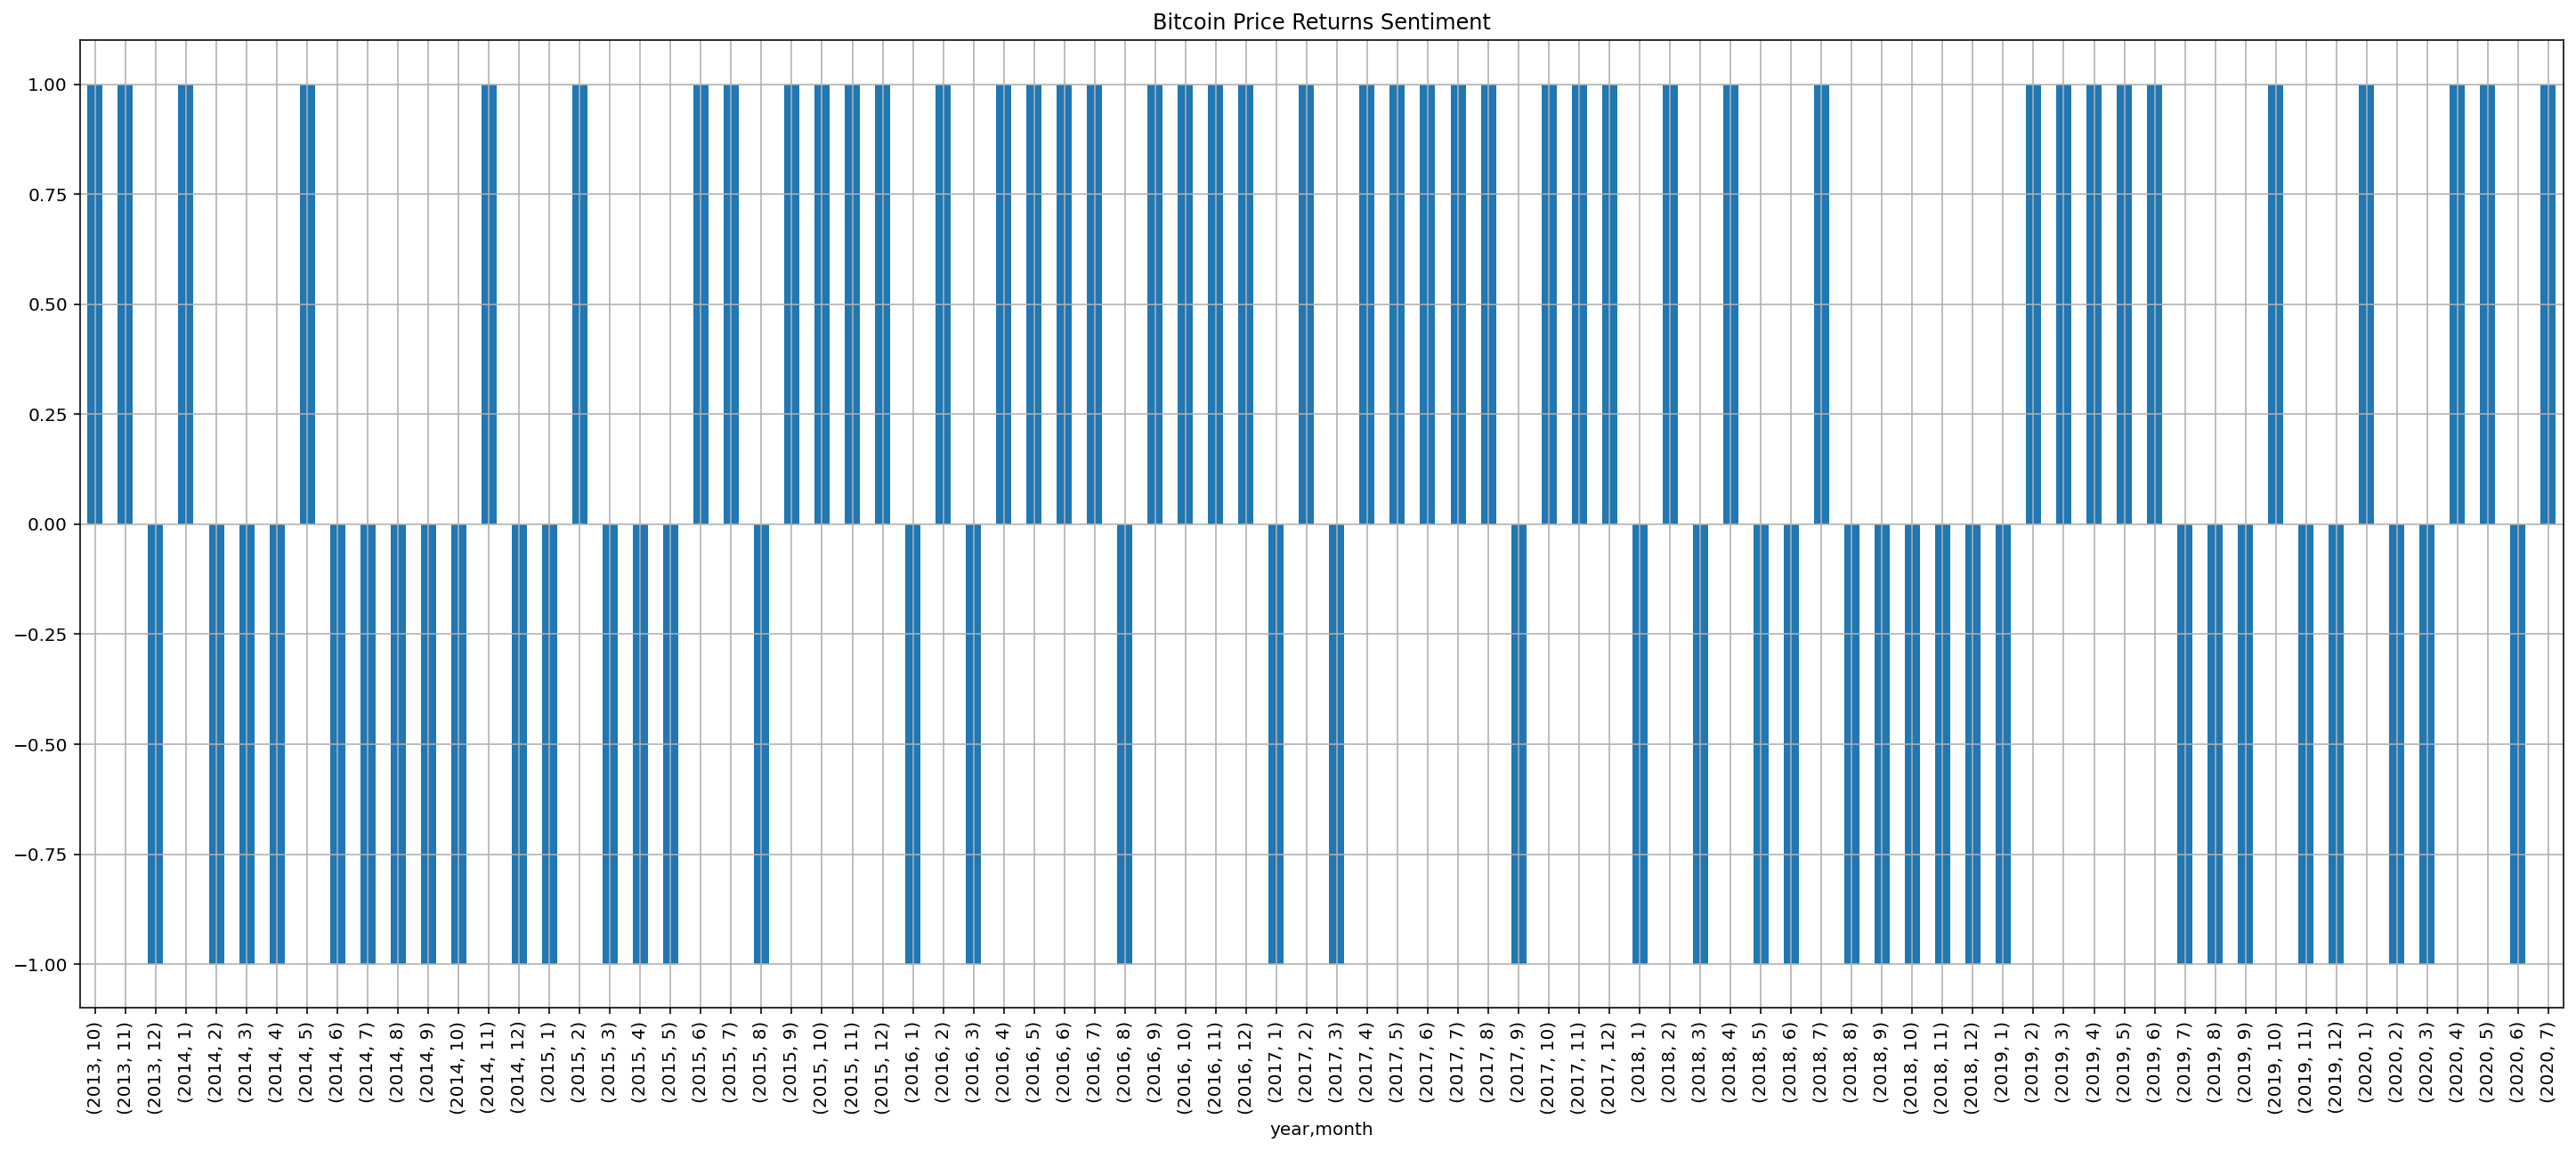

In [60]:
# Plot Price Returns Sentiment
tempdf2.plot(
    y=["Price_Sentiment"],
    kind="bar",
    title="Bitcoin Price Returns Sentiment",
    figsize=(25, 10),
    grid=True,
)

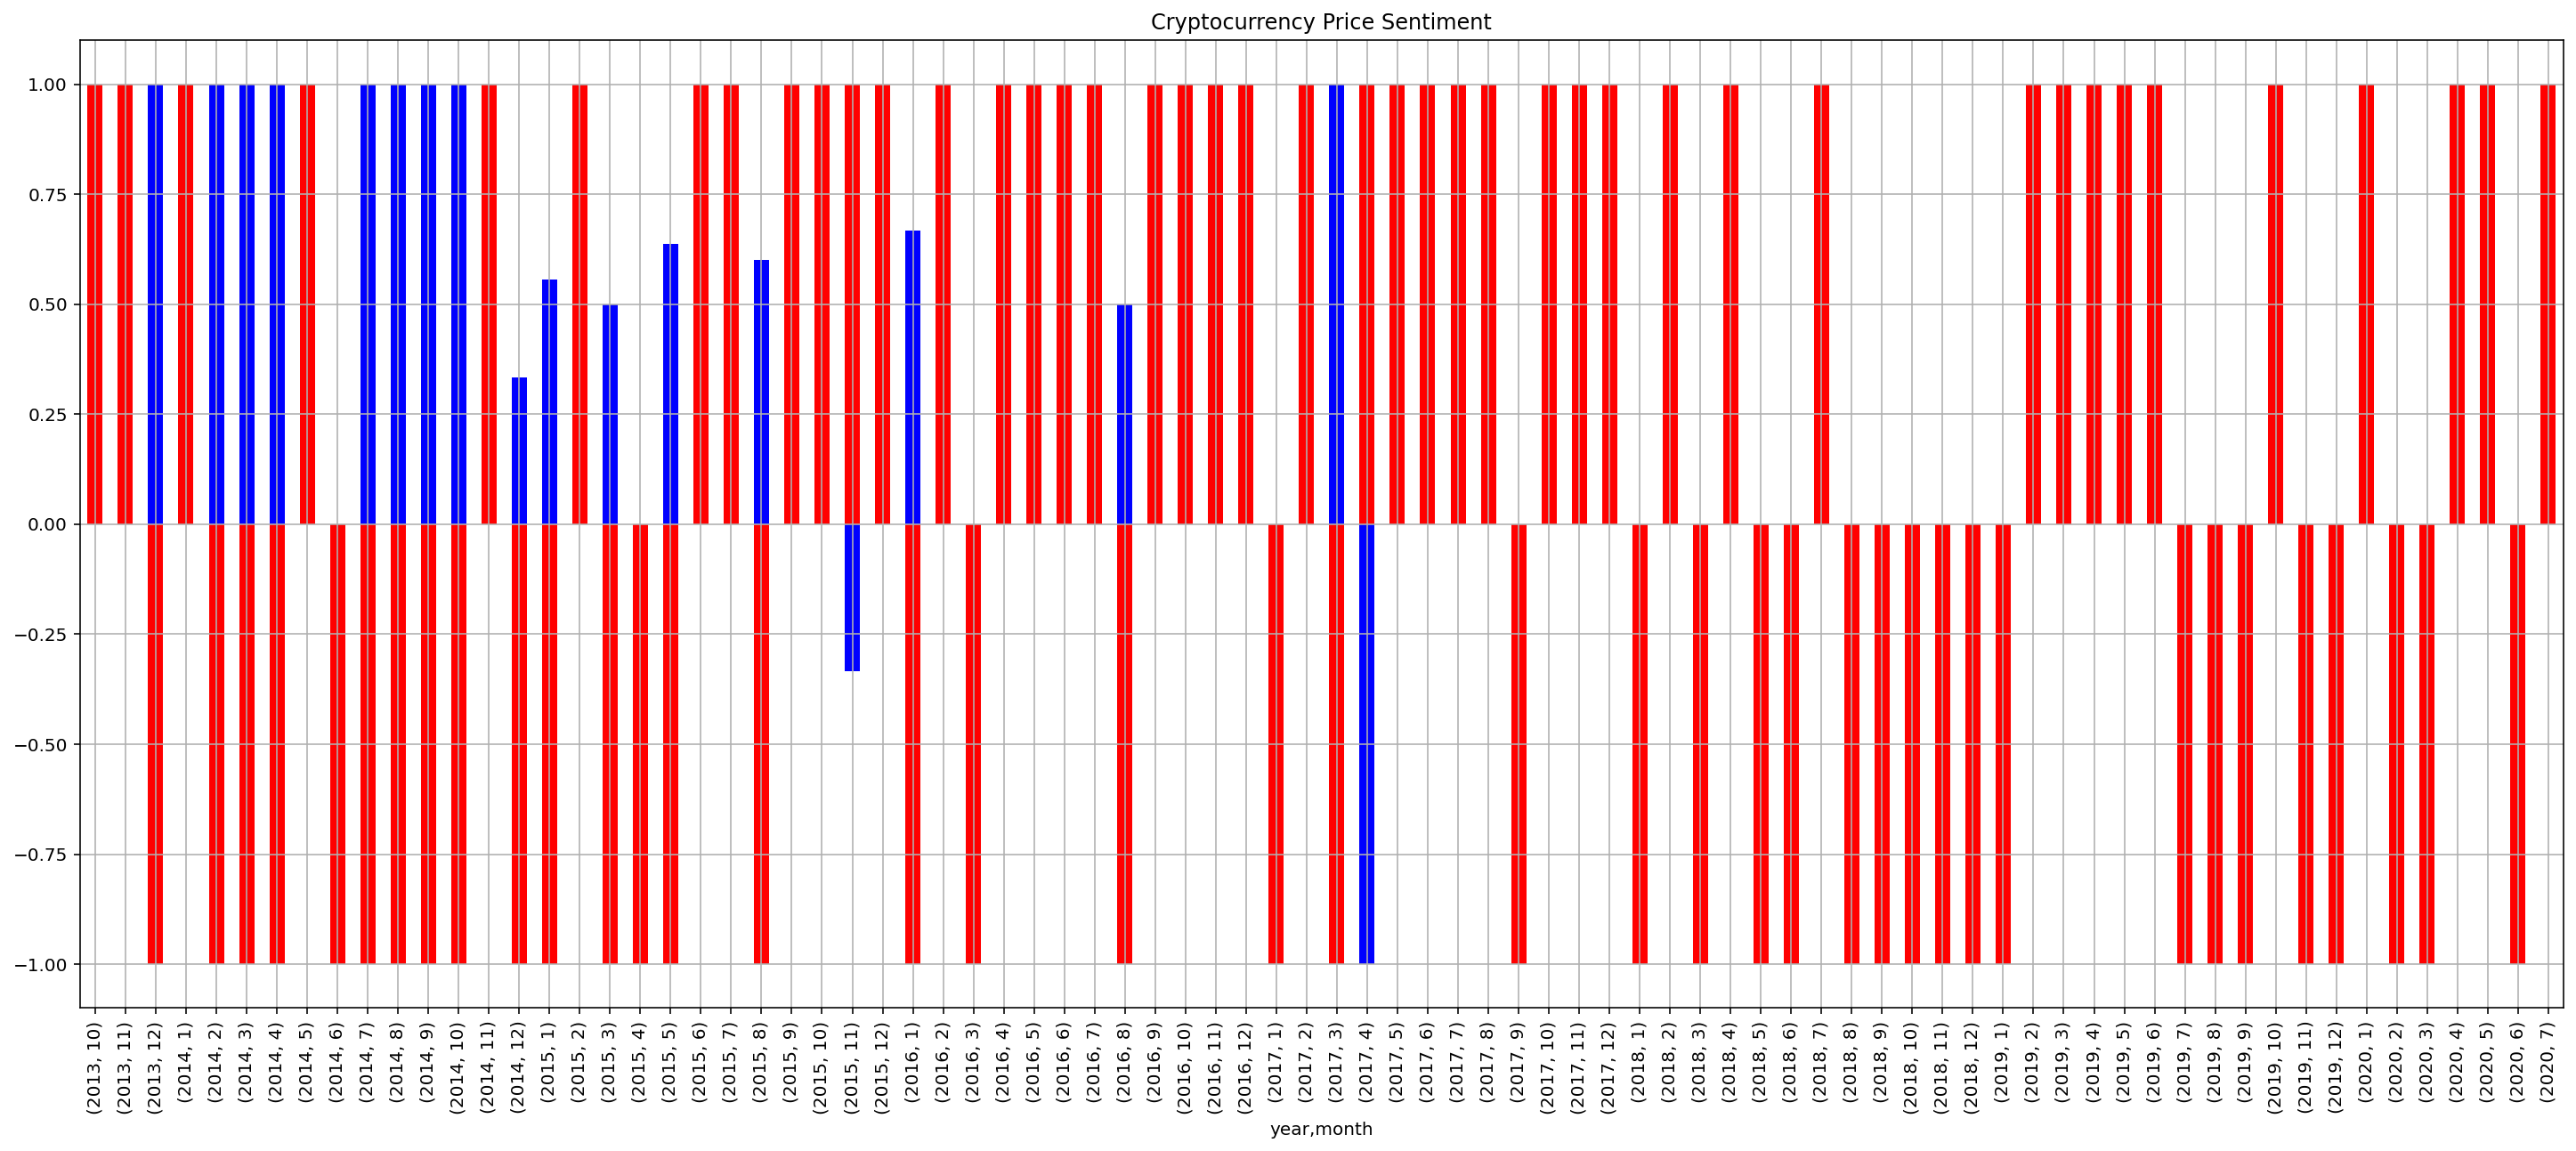

In [61]:
# Plot Average Monthly Article Sentiment
ax = newdf4.plot(
    color= 'b',
    y=["Article_Sentiment"],
    kind="bar",
    title="NYT Cryptocurrency Article Text Sentiment",
    figsize=(25, 10),
    grid=True,
)
# Overlay Price Returns Sentiment
tempdf2.plot(
    ax=ax,
    color= 'r',
    y=["Price_Sentiment"],
    kind="bar",
    title="Cryptocurrency Price Sentiment",
    figsize=(25, 10),
    grid=True,
)

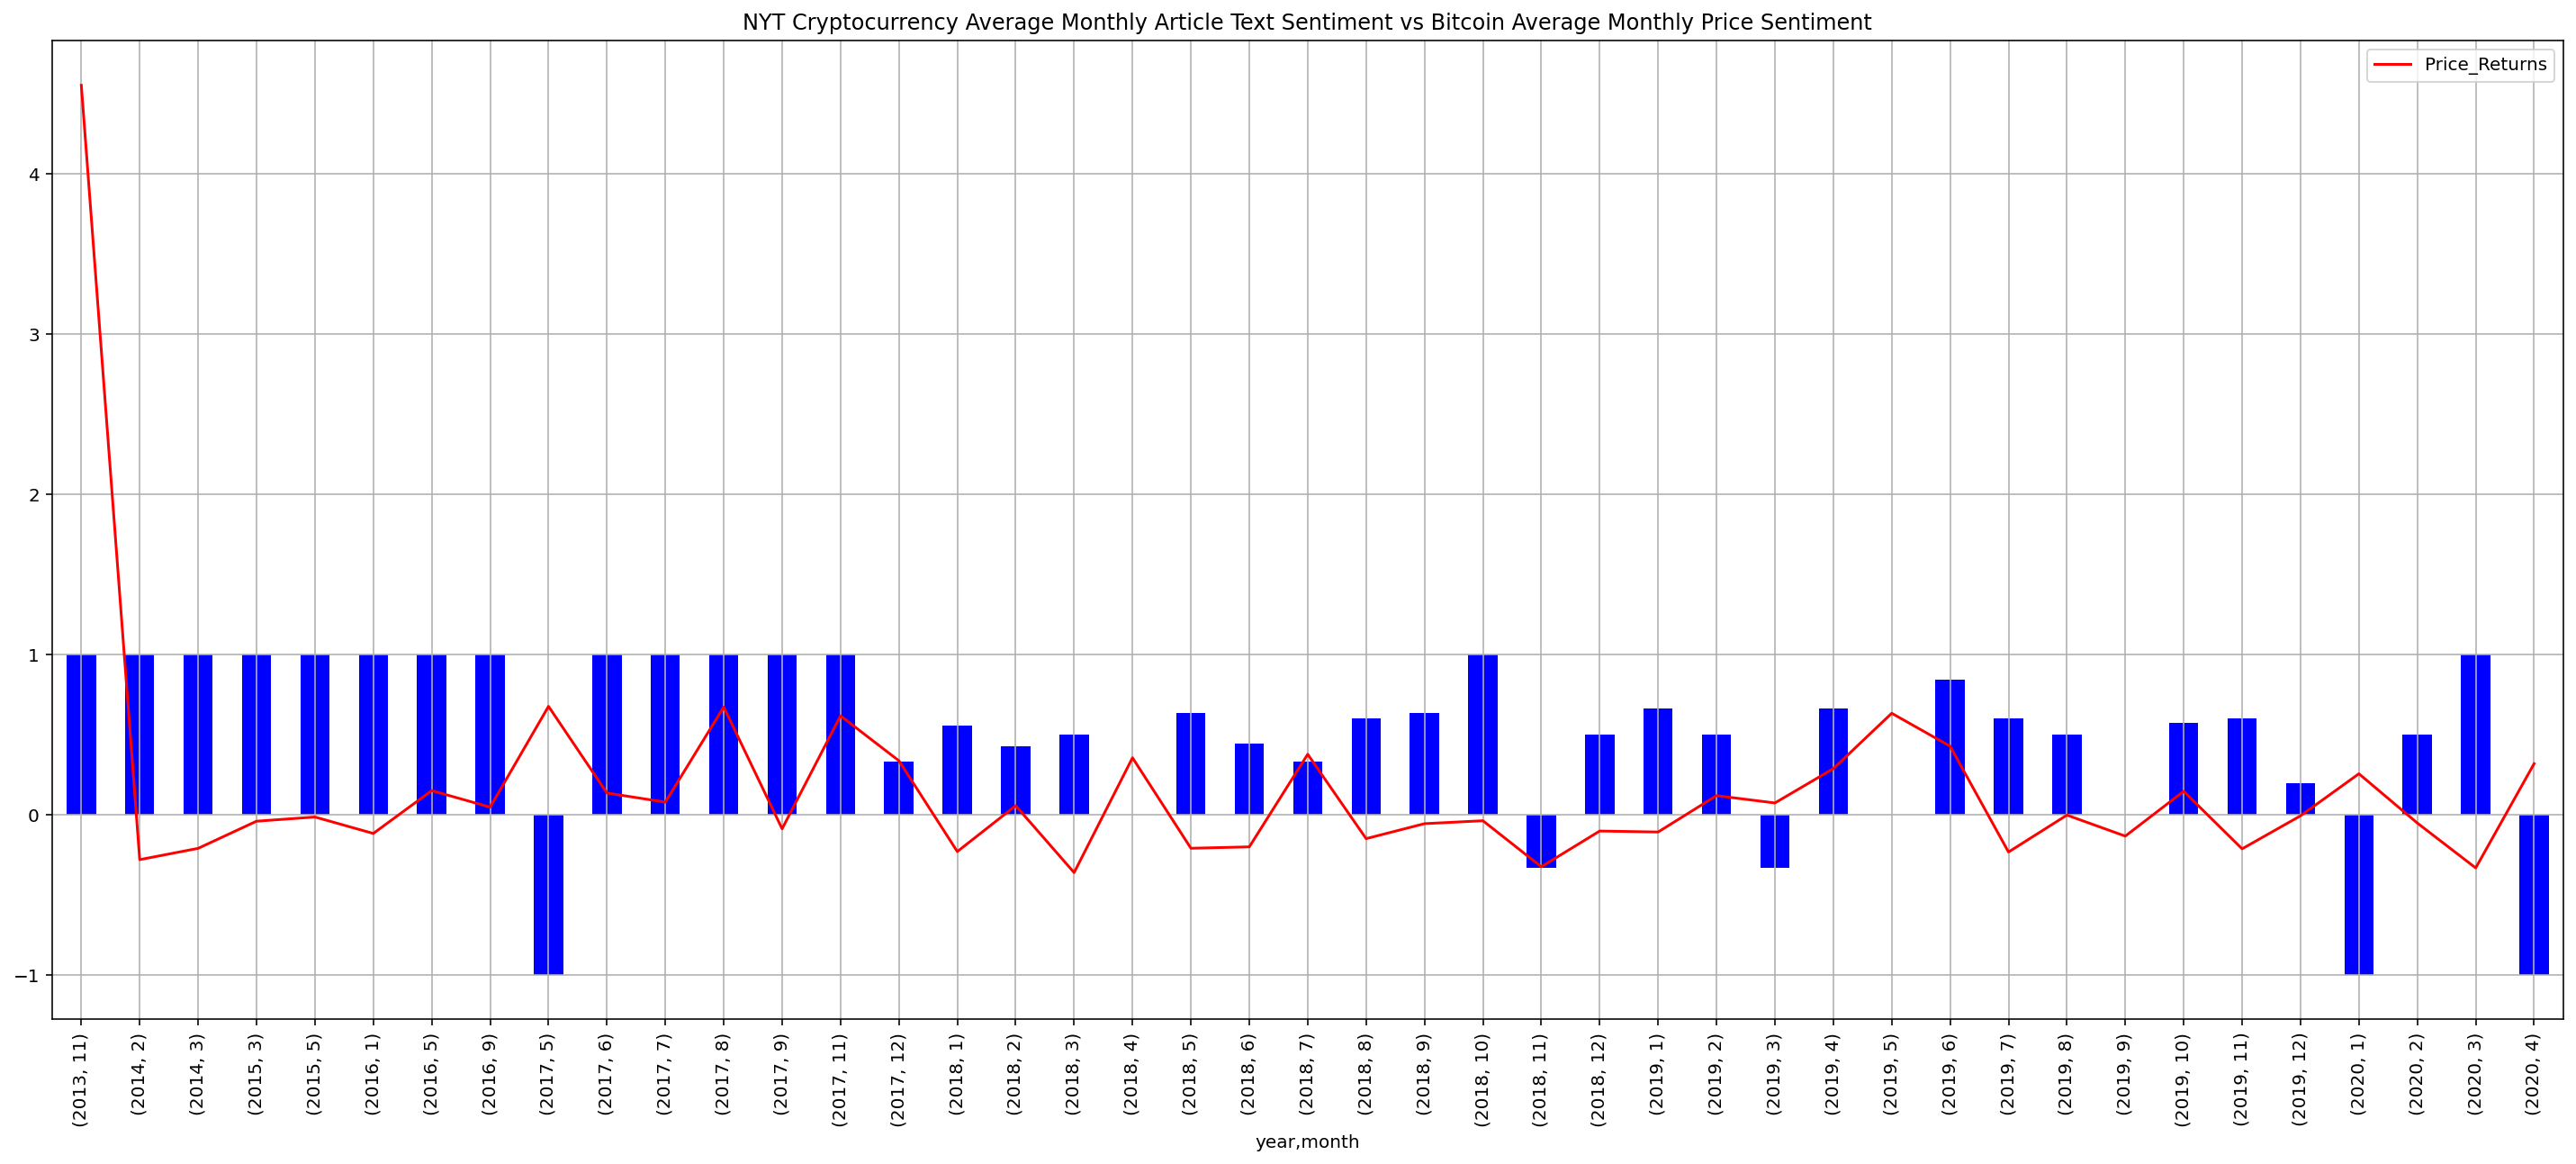

In [86]:
# Plot Average Monthly Article Sentiment
ax = newdf4.plot(
    color= 'b',
    y=["Article_Sentiment"],
    kind="bar",
    title="NYT Cryptocurrency Average Monthly Article Text Sentiment",
    figsize=(25, 10),
    grid=True,
)
# Overlay Average Monthly Price Returns Sentiment
tempdf11.plot(
    ax=ax,
    color= 'r',
    rot=90,
    y=["Price_Returns"],
    kind="line",
    title="NYT Cryptocurrency Average Monthly Article Text Sentiment vs Bitcoin Average Monthly Price Sentiment",
    figsize=(25, 10),
    grid=True,
)

In [ ]:
# Use for hosted Runtime 
os.environ['HV_DOC_HTML'] = 'true' 
hv.extension('bokeh') 

# Plot NYT Cryptocurrency Average Monthly Article Text Sentiment vs Bitcoin Average Monthly Price Sentiment in hvplot
plot1 = newdf4.hvplot(y=["Article_Sentiment"], width=1800, height=900, size=50, alpha=0.6)

plot2 = tempdf4.hvplot(y=["Price_Returns"], size=70, alpha=0.6)

hvplot.show(plot1 * plot2)

In [65]:
# Copy 'published_date' and 'headline' to new DataFrame
tempdf5 = nyt[['published_date','headline']]

In [66]:
# Group data by year and month and get a count of how many articles were written each month
tempdf5['month'] = pd.to_datetime(tempdf5['published_date']).dt.month
tempdf5['year'] = pd.to_datetime(tempdf5['published_date']).dt.year
tempdf6 = tempdf5[['year', 'month', 'headline']]
tempdf7 = tempdf6.groupby(['year', 'month'])['headline'].count()
tempdf7.head()

/Users/coreyrecai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/coreyrecai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year  month
2013  11       1
2014  2        1
      3        2
2015  3        1
      5        1
Name: headline, dtype: int64

In [67]:
# Write Article Count Data to csv
tempdf7.to_csv("article_count.csv", encoding='utf-8')

In [68]:
# Get the weights of Average monthly articles by diving the number of Monthly Articles by the total amount of Articles in the dataset
tempdf8 = pd.read_csv("article_count.csv", usecols=['headline'])

total_articles = tempdf8['headline'].sum()

tempdf8['Article_Weights'] = (tempdf8['headline']/total_articles)*100

tempdf8.head()

,headline,Article_Weights
0,1,0.476190
1,1,0.476190
2,2,0.952381
3,1,0.476190
4,1,0.476190


In [69]:
# Write Article Sentiment Data to csv
newdf4.to_csv("avg_mnthly_article_sent.csv", encoding='utf-8')

In [70]:
# Read Article Sentiment data to new DataFrame and add Article Weights Column
tempdf9 = pd.read_csv("avg_mnthly_article_sent.csv")
tempdf9['Article_Weights'] = tempdf8['Article_Weights']

In [71]:
# Calculate weighted sentiment by multiplying Article Sentiment by Article Weights
tempdf9['Weighted_Sentiment'] = tempdf9['Article_Sentiment']*tempdf9['Article_Weights']

In [72]:
tempdf9.describe()

,year,month,Article_Sentiment,Article_Weights,Weighted_Sentiment
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2017.720930,6.116279,0.510517,2.325581,1.151717
std,1.680782,3.506520,0.557175,2.217056,1.440736
min,2013.000000,1.000000,-1.000000,0.476190,-1.428571
25%,2017.000000,3.000000,0.380952,0.476190,0.476190
50%,2018.000000,6.000000,0.600000,1.428571,0.952381
75%,2019.000000,9.000000,1.000000,3.095238,1.428571
max,2020.000000,12.000000,1.000000,8.571429,5.238095


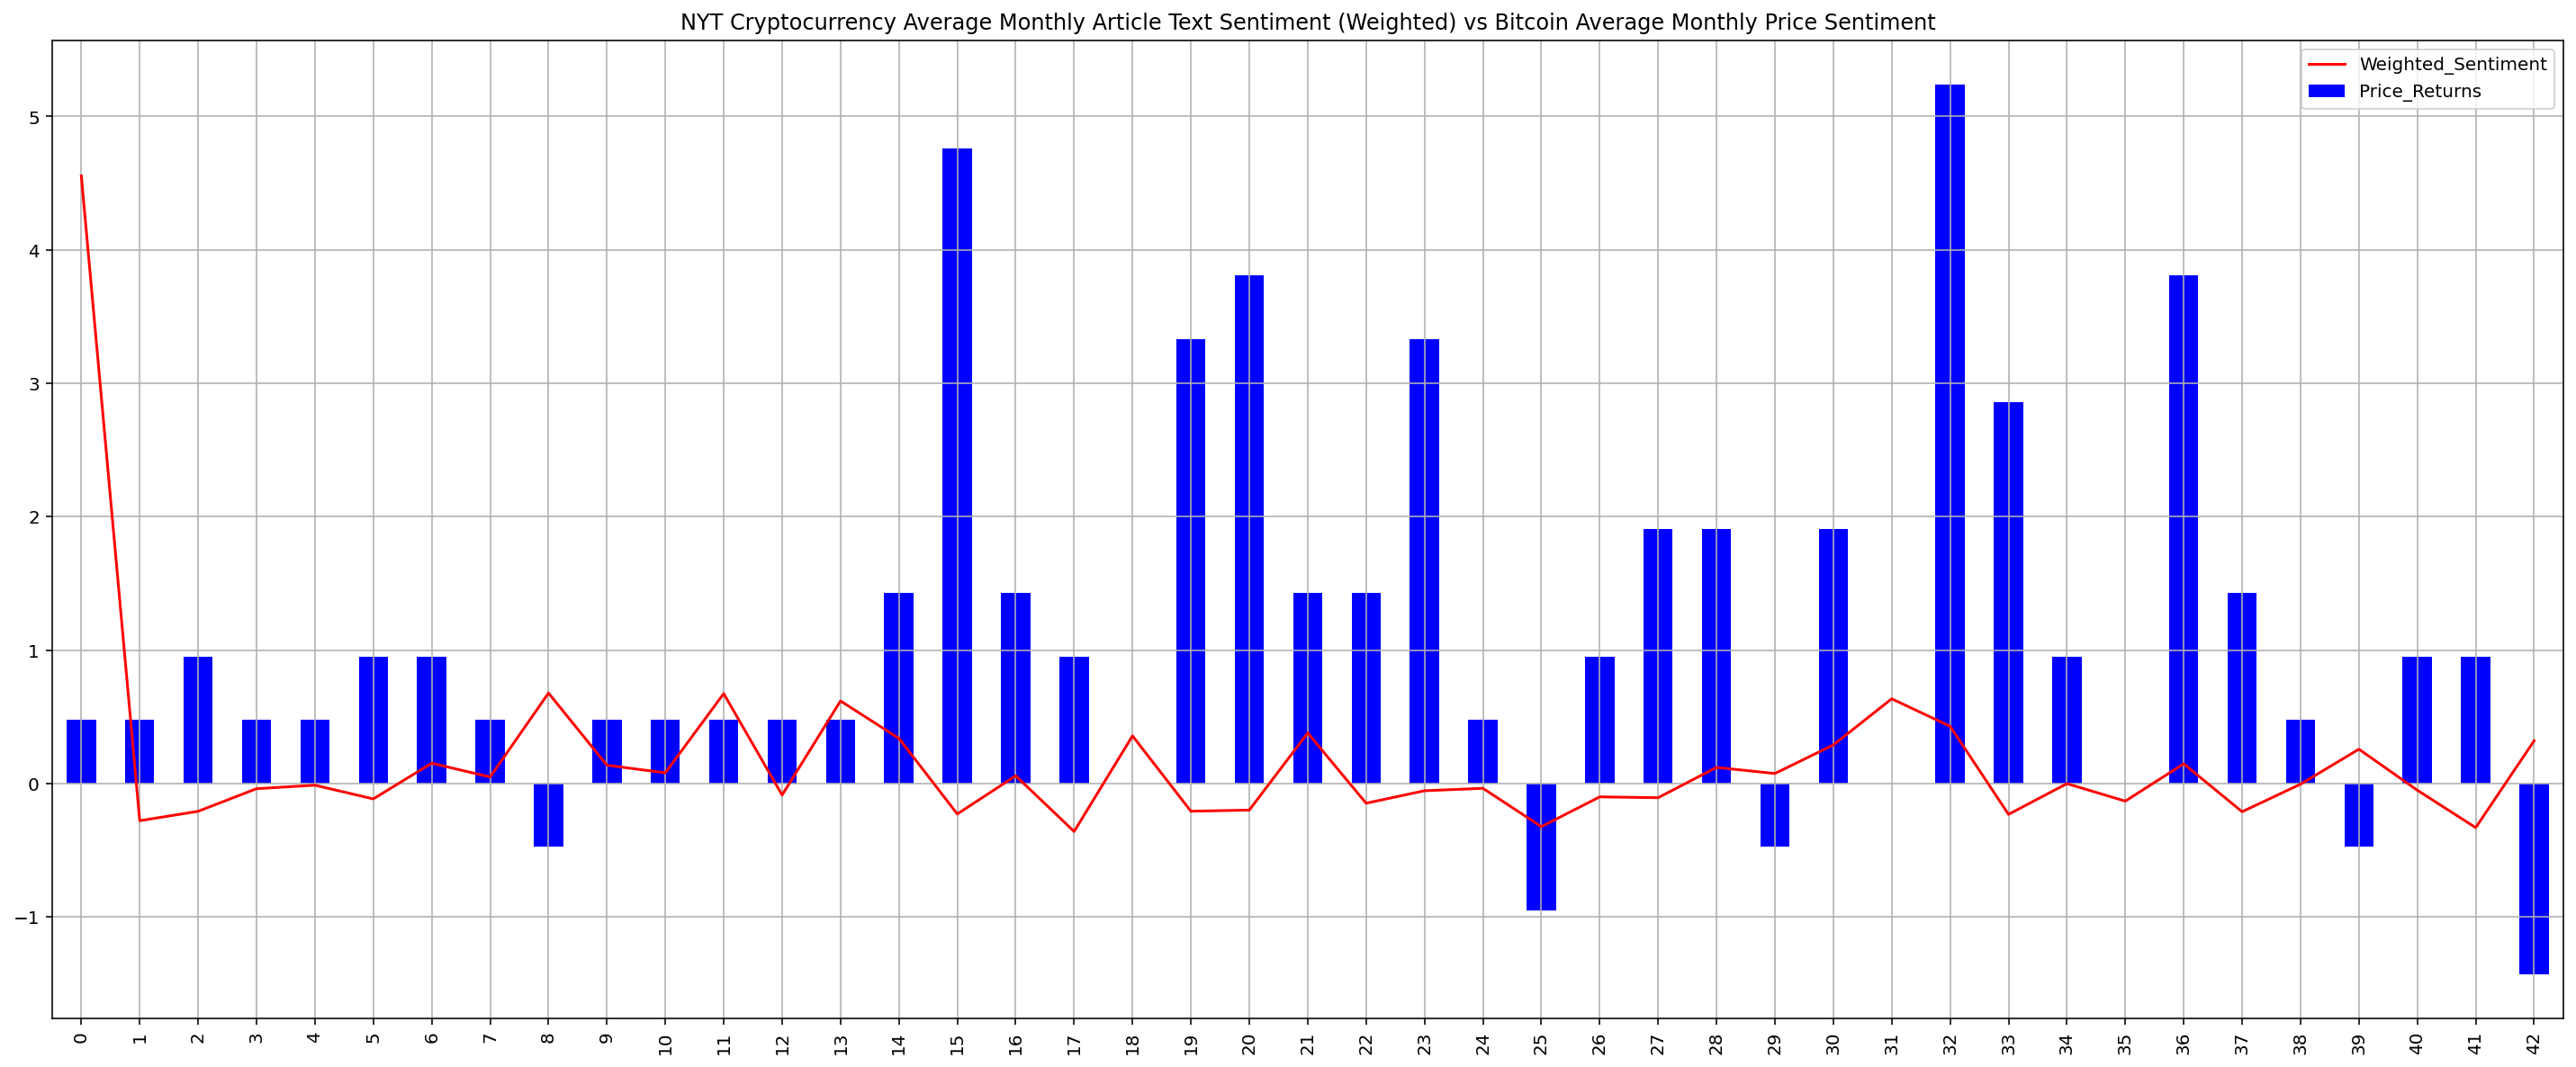

In [85]:
# Plot NYT Cryptocurrency Average Monthly Article Text Sentiment (Weighted) vs Bitcoin Average Monthly Price Sentiment
ax = tempdf9.plot(
    color= 'b',
    y=["Weighted_Sentiment"],
    kind="bar",
    title="NYT Cryptocurrency Average Monthly Article Text Sentiment (Weighted)",
    figsize=(25, 10),
    grid=True,
)
# Overlay Average Monthly Price Returns Sentiment
tempdf11.plot(
    ax=ax,
    color= 'r',
    rot=90,
    y=["Price_Returns"],
    kind="line",
    title="NYT Cryptocurrency Average Monthly Article Text Sentiment (Weighted) vs Bitcoin Average Monthly Price Sentiment",
    figsize=(25, 10),
    grid=True,
)

In [ ]:
correlation_df = pd.concat([tempdf11['Price_Returns'], tempdf9['Weighted_Sentiment']], axis="columns", join="inner")   
correlation = correlation_df.corr()
correlation

In [ ]:
sns.heatmap(correlation)

In [74]:
tempdf11 = pd.read_csv("avg_mnthly_price_returns.csv")

In [75]:
len(tempdf11["Price_Returns"])

82

In [76]:
len(tempdf9["Article_Sentiment"])

43

In [77]:
tempdf9_srch_dates = tempdf9[['year', 'month']].astype(str).apply(lambda x: '-'.join(x), axis=1)

In [78]:
tempdf11_srch_dates = tempdf11[['year', 'month']].astype(str).apply(lambda x: '-'.join(x), axis=1)

In [79]:
tempdf11['Date_0'] = tempdf11_srch_dates
tempdf11

,year,month,Price_Returns,Date_0
0,2013,10,0.602623,2013-10
1,2013,11,4.555082,2013-11
2,2013,12,-0.347298,2013-12
3,2014,1,0.097811,2014-1
4,2014,2,-0.279788,2014-2
...,...,...,...,...
77,2020,3,-0.331562,2020-3
78,2020,4,0.319420,2020-4
79,2020,5,0.213854,2020-5
80,2020,6,-0.031669,2020-6


In [80]:
tempdf11['Date_0'] = pd.to_datetime(tempdf11['Date_0'])

In [81]:
srch_list = pd.to_datetime(tempdf9_srch_dates)

tempdf11['Date_Search'] = tempdf11['Date_0'].isin(srch_list)
tempdf11

,year,month,Price_Returns,Date_0,Date_Search
0,2013,10,0.602623,2013-10-01,False
1,2013,11,4.555082,2013-11-01,True
2,2013,12,-0.347298,2013-12-01,False
3,2014,1,0.097811,2014-01-01,False
4,2014,2,-0.279788,2014-02-01,True
...,...,...,...,...,...
77,2020,3,-0.331562,2020-03-01,True
78,2020,4,0.319420,2020-04-01,True
79,2020,5,0.213854,2020-05-01,False
80,2020,6,-0.031669,2020-06-01,False


In [82]:
tempdf11 = tempdf11[tempdf11['Date_Search'] == True] 
tempdf11.reset_index(inplace=True)
tempdf11.drop(columns=['index', 'Date_0', 'Date_Search'], inplace=True)
tempdf11

/Users/coreyrecai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,month,Price_Returns
0,2013,11,4.555082
1,2014,2,-0.279788
2,2014,3,-0.209302
3,2015,3,-0.039766
4,2015,5,-0.013524
5,2016,1,-0.116262
6,2016,5,0.151241
7,2016,9,0.047960
8,2017,5,0.677334
9,2017,6,0.136302


In [83]:
tempdf11.drop(columns=['level_0'], inplace=True)
tempdf11

KeyError: ignored

In [84]:
y = tempdf9["Article_Sentiment"]
X = tempdf11["Price_Returns"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape